<a href="https://colab.research.google.com/github/SJinLee/BasicStats/blob/main/datamining2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://woosa7.github.io/R-Classification-Decision-Tree/

In [2]:
install.packages('party')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’




In [4]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [5]:
library(party)
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [6]:
idx <- sample(2, nrow(iris), replace = T, prob = c(0.6, 0.4))
table(idx)

idx
 1  2 
94 56 

In [7]:
train_1 <- iris[idx == 1, ]
test_1 <- iris[idx == 2, ]

# train data 이용한 모델링
tree_model <- ctree(Species ~ ., data = train_1)
tree_model


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  94 

1) Petal.Length <= 1.9; criterion = 1, statistic = 87.883
  2)*  weights = 30 
1) Petal.Length > 1.9
  3) Petal.Width <= 1.6; criterion = 1, statistic = 44.796
    4) Petal.Length <= 4.6; criterion = 0.985, statistic = 8.411
      5)*  weights = 29 
    4) Petal.Length > 4.6
      6)*  weights = 9 
  3) Petal.Width > 1.6
    7)*  weights = 26 

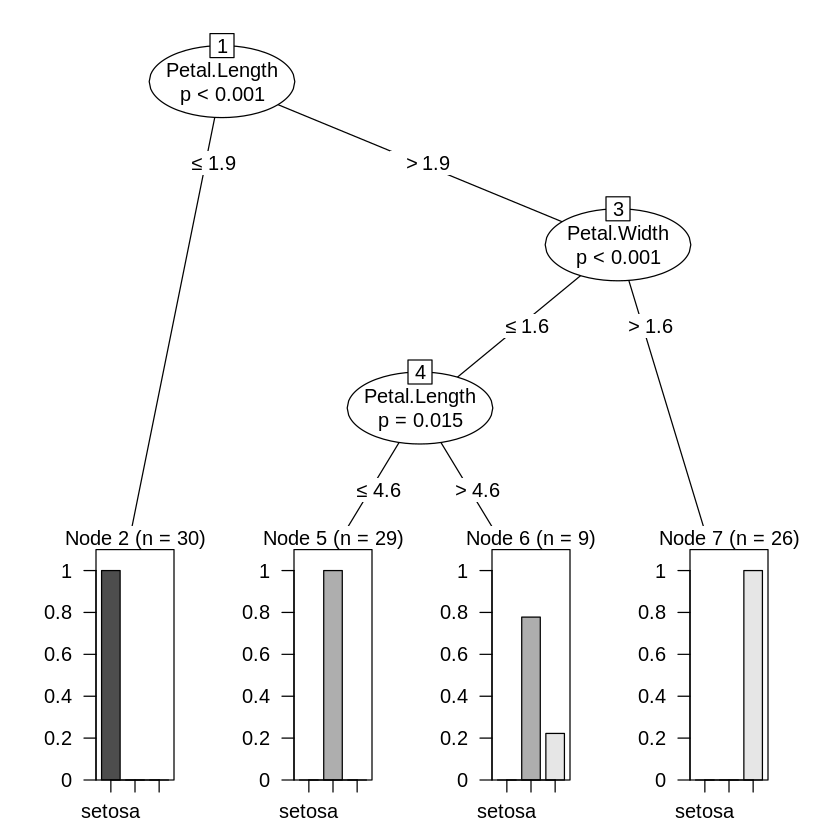

In [8]:
plot(tree_model)

### [연습문제]

In [10]:
df <- read.csv('csv/company_bankruptcy.csv')

In [11]:
dim(df)

[1] 6241   96

In [12]:
str(df)

'data.frame':	6241 obs. of  96 variables:
 $ Bankrupt.                                              : int  1 1 1 1 1 1 0 0 0 0 ...
 $ ROA.C..before.interest.and.depreciation.before.interest: num  0.371 0.464 0.426 0.4 0.465 ...
 $ ROA.A..before.interest.and...after.tax                 : num  0.424 0.538 0.499 0.451 0.538 ...
 $ ROA.B..before.interest.and.depreciation.after.tax      : num  0.406 0.517 0.472 0.458 0.522 ...
 $ Operating.Gross.Margin                                 : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Realized.Sales.Gross.Margin                            : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Operating.Profit.Rate                                  : num  0.999 0.999 0.999 0.999 0.999 ...
 $ Pre.tax.net.Interest.Rate                              : num  0.797 0.797 0.796 0.797 0.797 ...
 $ After.tax.net.Interest.Rate                            : num  0.809 0.809 0.808 0.809 0.809 ...
 $ Non.industry.income.and.expenditure.revenue            : num  0.303 0.304 0.30

In [13]:
colnames(df)[grep('ratio',colnames(df))]

[1] "Debt.ratio.."                        
[2] "Long.term.fund.suitability.ratio..A."

In [14]:
colnames(df)[grep('Ra',colnames(df))]

[1] "Operating.Profit.Rate"                             
 [2] "Pre.tax.net.Interest.Rate"                         
 [3] "After.tax.net.Interest.Rate"                       
 [4] "Operating.Expense.Rate"                            
 [5] "Realized.Sales.Gross.Profit.Growth.Rate"           
 [6] "Operating.Profit.Growth.Rate"                      
 [7] "After.tax.Net.Profit.Growth.Rate"                  
 [8] "Regular.Net.Profit.Growth.Rate"                    
 [9] "Continuous.Net.Profit.Growth.Rate"                 
[10] "Total.Asset.Growth.Rate"                           
[11] "Net.Value.Growth.Rate"                             
[12] "Total.Asset.Return.Growth.Rate.Ratio"              
[13] "Current.Ratio"                                     
[14] "Quick.Ratio"                                       
[15] "Interest.Expense.Ratio"                            
[16] "Inventory.Turnover.Rate..times."                   
[17] "Net.Worth.Turnover.Rate..times."                   
[18] "Current.Asset.Turnover.Rate"                       
[19] "Quick.Asset.Turnover.Rate"                         
[20] "Working.capitcal.Turnover.Rate"                    
[21] "Cash.Turnover.Rate"                                
[22] "Interest.Coverage.Ratio..Interest.expense.to.EBIT."

In [15]:
fivecols <- c('Interest.Coverage.Ratio..Interest.expense.to.EBIT.',
             'Interest.Expense.Ratio',
             'Interest.bearing.debt.interest.rate',
             'Working.capitcal.Turnover.Rate',
             'Total.Asset.Growth.Rate',
             'Bankrupt.')
df5 <- df[fivecols]

In [16]:
table(df5[['Bankrupt.']])/nrow(df5)


         0          1 
0.96699247 0.03300753 

In [17]:
set.seed(1)
idx <- sample(2, nrow(df5), replace = T, prob = c(0.7, 0.3))
table(idx)

idx
   1    2 
4326 1915 

In [18]:
train_1 <- df5[idx == 1, ]
test_1 <- df5[idx == 2, ]

# train data 이용한 모델링
tree_model <- ctree(Bankrupt. ~ ., data = train_1)
tree_model


	 Conditional inference tree with 7 terminal nodes

Response:  Bankrupt. 
Inputs:  Interest.Coverage.Ratio..Interest.expense.to.EBIT., Interest.Expense.Ratio, Interest.bearing.debt.interest.rate, Working.capitcal.Turnover.Rate, Total.Asset.Growth.Rate 
Number of observations:  4326 

1) Total.Asset.Growth.Rate <= 6.16e+09; criterion = 0.975, statistic = 7.874
  2) Total.Asset.Growth.Rate <= 1.32e+09; criterion = 1, statistic = 18.804
    3)*  weights = 871 
  2) Total.Asset.Growth.Rate > 1.32e+09
    4) Total.Asset.Growth.Rate <= 3.14e+09; criterion = 1, statistic = 34.016
      5)*  weights = 24 
    4) Total.Asset.Growth.Rate > 3.14e+09
      6) Total.Asset.Growth.Rate <= 5.26e+09; criterion = 0.976, statistic = 7.962
        7) Working.capitcal.Turnover.Rate <= 0.5938789; criterion = 1, statistic = 16.771
          8)*  weights = 35 
        7) Working.capitcal.Turnover.Rate > 0.5938789
          9) Interest.Expense.Ratio <= 0.6303369; criterion = 0.988, statistic = 9.219
         

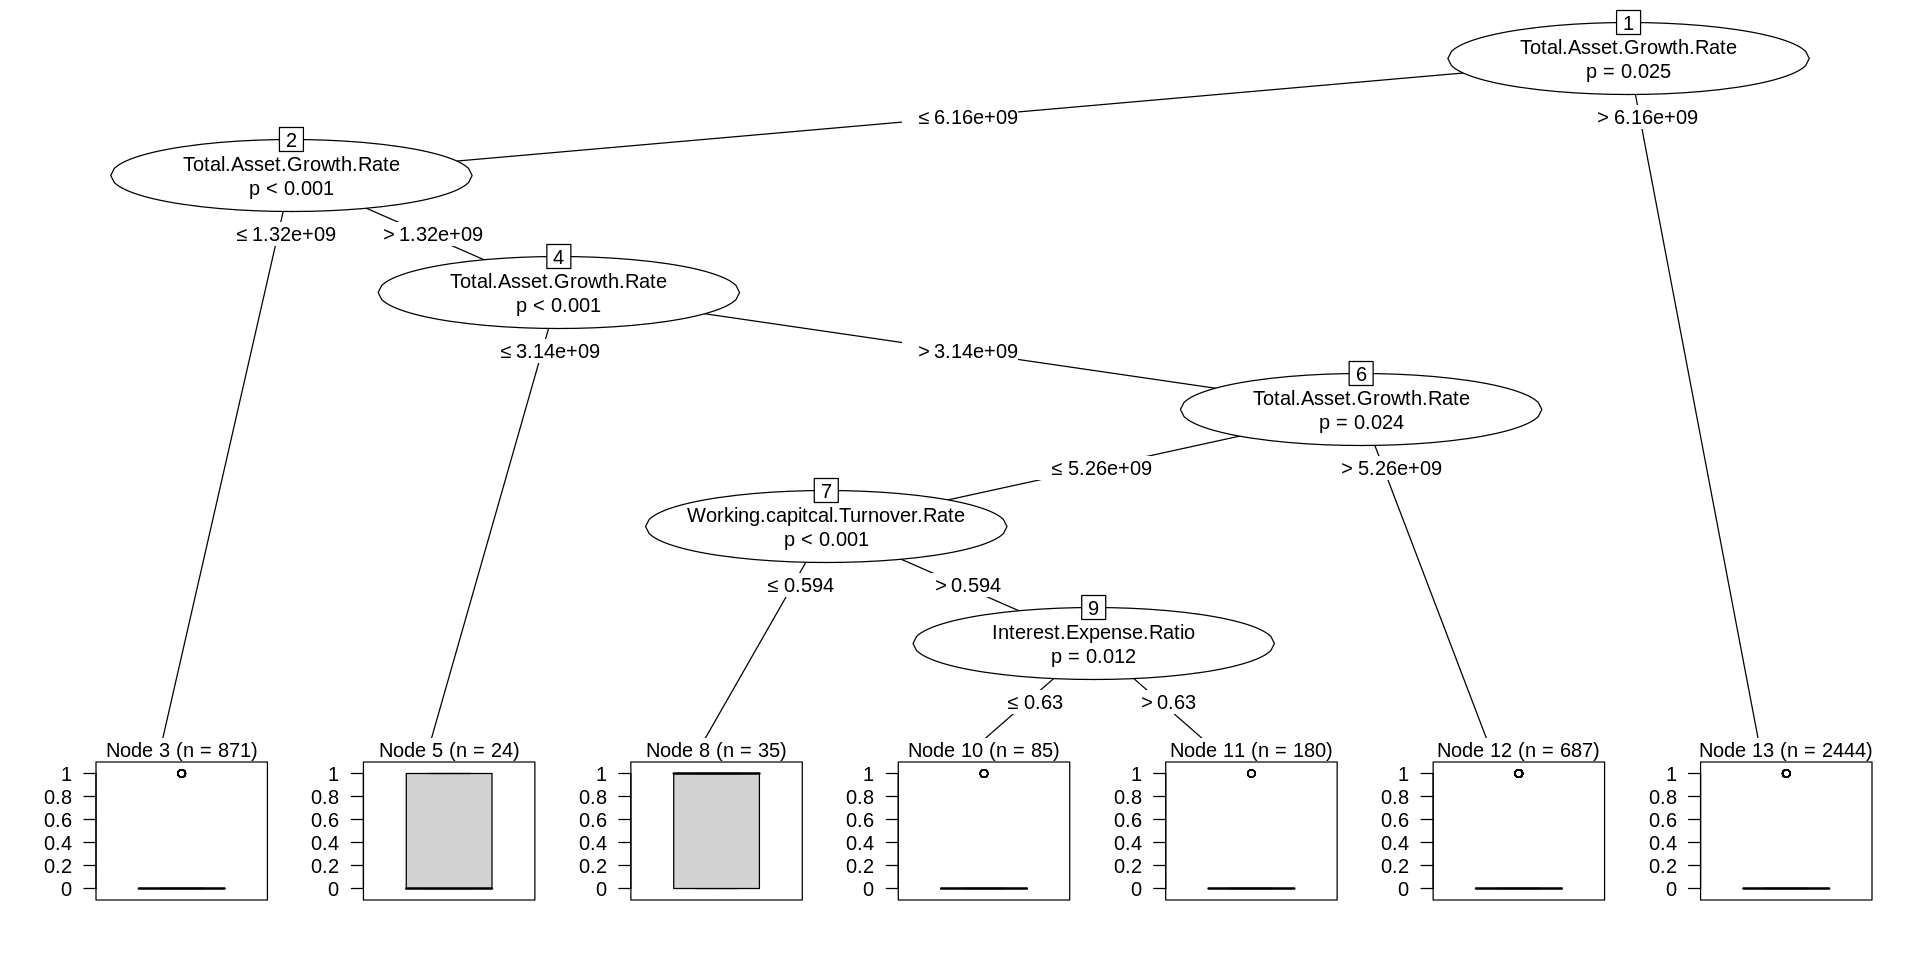

In [19]:
options(repr.plot.width=16, repr.plot.height=8)
plot(tree_model)

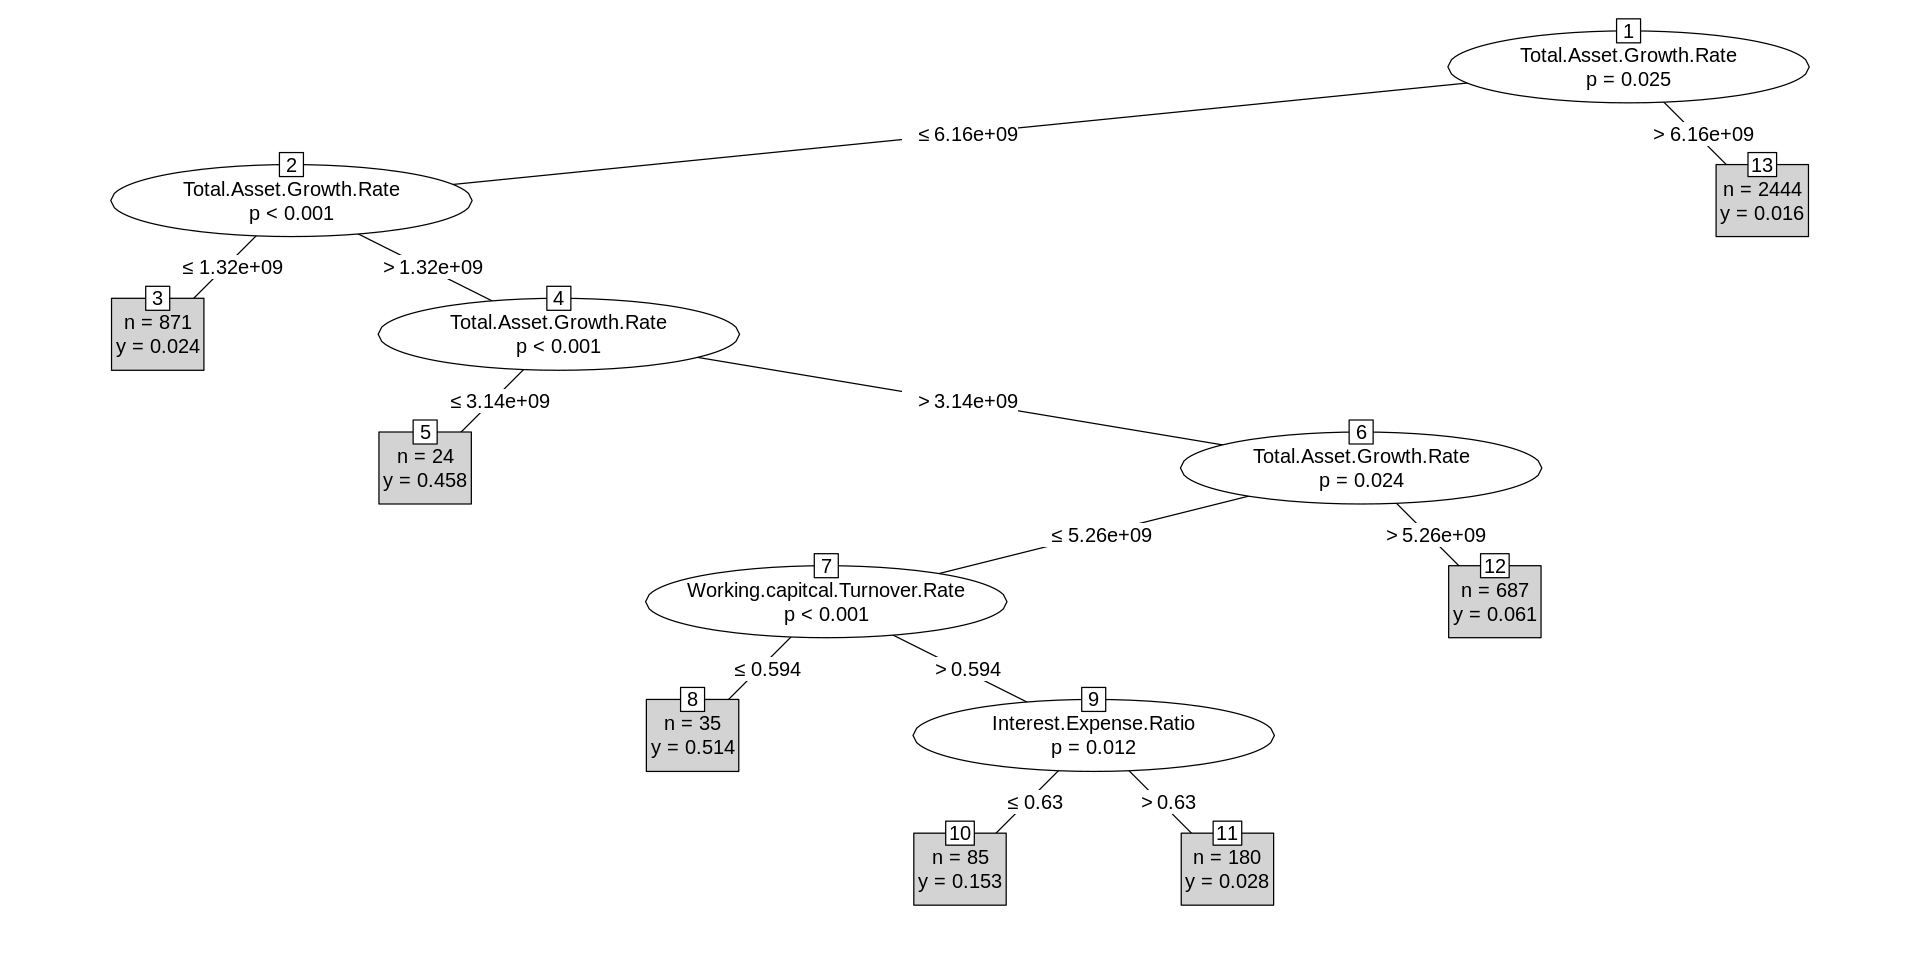

In [20]:
plot(tree_model, type = "simple")

In [21]:
pred<- as.factor(predict(tree_model)[,1]>0.2)
t <- as.factor(train_1$Bankrupt.)
levels(t) <- c(F,T)
confusionMatrix(pred, t)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  4147  120
     TRUE     30   29
                                          
               Accuracy : 0.9653          
                 95% CI : (0.9594, 0.9706)
    No Information Rate : 0.9656          
    P-Value [Acc > NIR] : 0.5548          
                                          
                  Kappa : 0.2645          
                                          
 Mcnemar's Test P-Value : 3.68e-13        
                                          
            Sensitivity : 0.9928          
            Specificity : 0.1946          
         Pos Pred Value : 0.9719          
         Neg Pred Value : 0.4915          
             Prevalence : 0.9656          
         Detection Rate : 0.9586          
   Detection Prevalence : 0.9864          
      Balanced Accuracy : 0.5937          
                                          
       'Positive' Class : FALSE           
                     

In [22]:
pred<- as.factor(predict(tree_model,newdata=test_1)[,1]>0.2)
t <- as.factor(test_1$Bankrupt.)
levels(t) <- c(F,T)
confusionMatrix(pred, t)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  1844   53
     TRUE     14    4
                                          
               Accuracy : 0.965           
                 95% CI : (0.9558, 0.9728)
    No Information Rate : 0.9702          
    P-Value [Acc > NIR] : 0.9182          
                                          
                  Kappa : 0.0937          
                                          
 Mcnemar's Test P-Value : 3.443e-06       
                                          
            Sensitivity : 0.99247         
            Specificity : 0.07018         
         Pos Pred Value : 0.97206         
         Neg Pred Value : 0.22222         
             Prevalence : 0.97023         
         Detection Rate : 0.96292         
   Detection Prevalence : 0.99060         
      Balanced Accuracy : 0.53132         
                                          
       'Positive' Class : FALSE           
                     